# Library Declaration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import warnings
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
%matplotlib inline
warnings.filterwarnings("ignore")

# DataSet 

In [3]:
df = pd.read_csv('C:/Users/sachin/Downloads/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# NASDAQ.AAPL FORECAST

# DATA OPTIMIZATION

In [24]:
df['logaapl']=np.log(df['NASDAQ.AAPL'])
df['diflogaapl']=df['logaapl']-df['logaapl'].shift(periods=-1)
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500,logaapl,diflogaapl
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,7.767945,-0.000207,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,7.768153,0.000601,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,7.767552,-0.000690,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,7.768242,-0.000228,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,7.768470,-0.000326,4.967449,-0.000835


In [25]:
df.dropna(inplace=True)

In [26]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH  

In [6]:
df.shape

(41265, 504)

# NASDAQ AAPL DATASET

In [27]:
df_new=df[['DATE','NASDAQ.AAPL','logaapl','diflogaapl']]
df_new.head()


,DATE,NASDAQ.AAPL,logaapl,diflogaapl
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

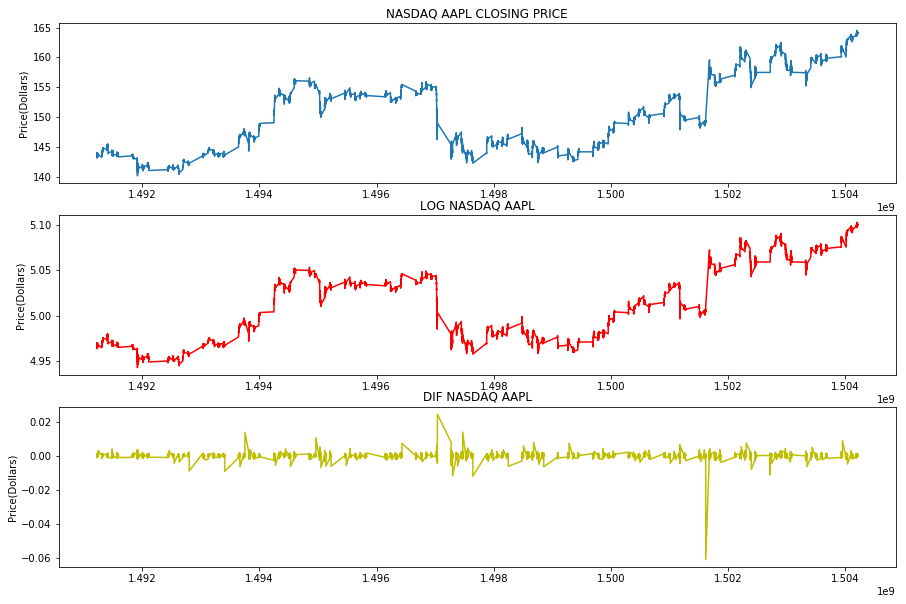

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.AAPL'],label='NASDAQ AAPL')
plt.title('NASDAQ AAPL CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logaapl,label='LOG NASDAQ AAPL',color='r')
plt.title('LOG NASDAQ AAPL')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogaapl,label='DIFFERENCE IN NASDAQ AAPL',color='y')
plt.title('DIF NASDAQ AAPL')
plt.ylabel('Price(Dollars)')



# PACF OF NASDAQ AAPL

Text(0,0.5,'PACF')

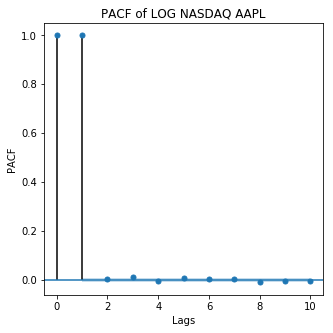

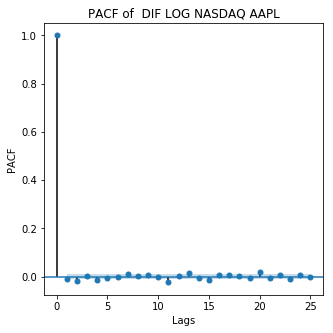

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logaapl,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ AAPL')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogaapl,lags=25,ax=ax)
ax.set_title('PACF of  DIF LOG NASDAQ AAPL')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF NASDAQ AAPL

Text(0.5,1,'ACF OF DIFLOG NASDAQ AAPL')

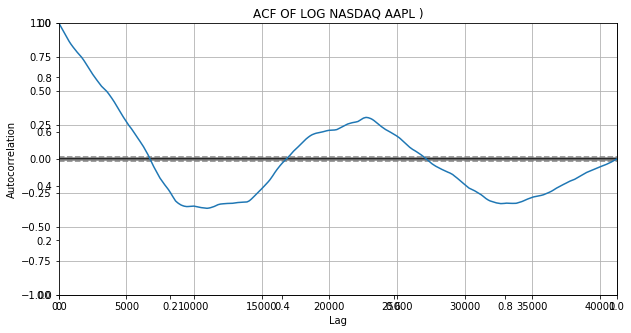

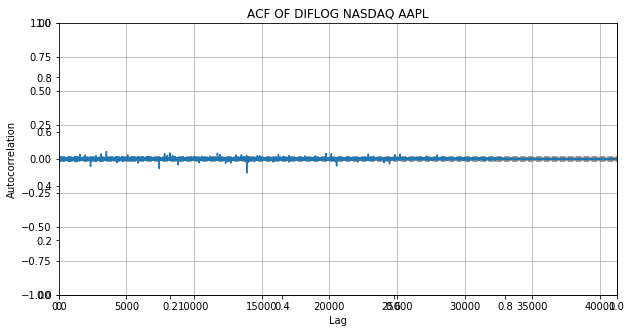

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logaapl)
ax.set_title('ACF OF LOG NASDAQ AAPL )')
warnings.filterwarnings("ignore")
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogaapl)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF DIFLOG NASDAQ AAPL')

# FINDING THE BEST P,D,Q VALUES OF ARIMA MODEL

In [31]:
arr=(df_new.logaapl.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            warnings.filterwarnings("ignore")
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -492689.628814453
(0, 1, 1) -492691.2955018546
(0, 1, 2) -492702.40871225984
(1, 1, 0) -492691.1705248717
(1, 1, 1) -492691.69245713274
(1, 1, 2) -492703.1002256031
(2, 1, 0) -492702.1444647424
(2, 1, 1) -492702.5477501885
Best model is : (1, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [32]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()
warnings.filterwarnings("ignore")

In [33]:
ARIMA_mod

In [34]:
ARIMA_mod.predict()
warnings.filterwarnings("ignore")

In [35]:
print('Length of ARIMA MODEL',len(ARIMA_mod.predict()))
warnings.filterwarnings("ignore")

Length of ARIMA MODEL 41263


In [16]:
df_new.shape

(41265, 4)

In [36]:
df_new.drop([0],axis=0,inplace=True)
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.AAPL,logaapl,diflogaapl
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835
5,1491226500,143.7800,4.968284,-0.000584


In [18]:
df_new.shape

(41264, 4)

In [37]:
df_new['predict']=ARIMA_mod.predict()
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.AAPL,logaapl,diflogaapl,predict
1,1491226260,143.7000,4.967728,0.000069,0.000003
2,1491226320,143.6901,4.967659,0.000349,0.000002
3,1491226380,143.6400,4.967310,-0.000139,0.000001
4,1491226440,143.6600,4.967449,-0.000835,0.000008
5,1491226500,143.7800,4.968284,-0.000584,0.000008


# ERROR VISUALIZATION

In [38]:
print('Mean Square Error:',np.mean(np.square(np.array((df_new['diflogaapl']-df_new['predict'])))))

Mean Square Error: 3.820881636680846e-07


In [39]:
error=(df_new['diflogaapl']-df_new['predict'])
warnings.filterwarnings("ignore")
df_new['Error']=error
df_new['SquareError']=np.square(error)


In [40]:
df_new.head()

,DATE,NASDAQ.AAPL,logaapl,diflogaapl,predict,Error,SquareError
1,1491226260,143.7000,4.967728,0.000069,0.000003,0.000066,4.315224e-09
2,1491226320,143.6901,4.967659,0.000349,0.000002,0.000347,1.202587e-07
3,1491226380,143.6400,4.967310,-0.000139,0.000001,-0.000141,1.978730e-08
4,1491226440,143.6600,4.967449,-0.000835,0.000008,-0.000843,7.113630e-07
5,1491226500,143.7800,4.968284,-0.000584,0.000008,-0.000592,3.501250e-07


Text(0,0.5,'Date')

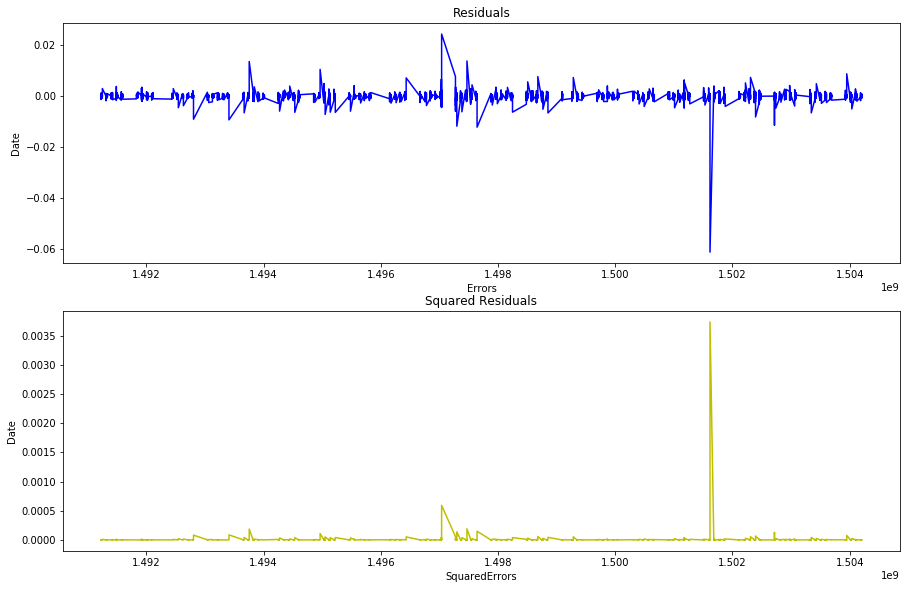

In [41]:
fig,ax=plt.subplots(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')

Text(0.5,1,'ACF OF SQUARE ERROR')

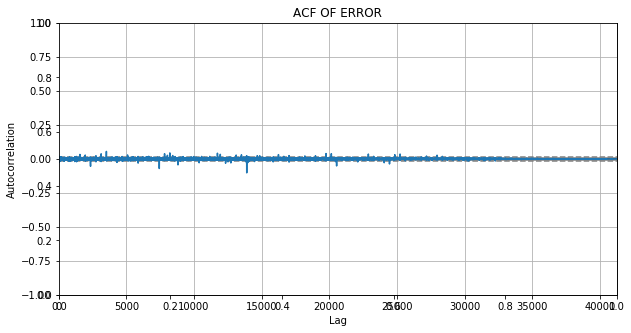

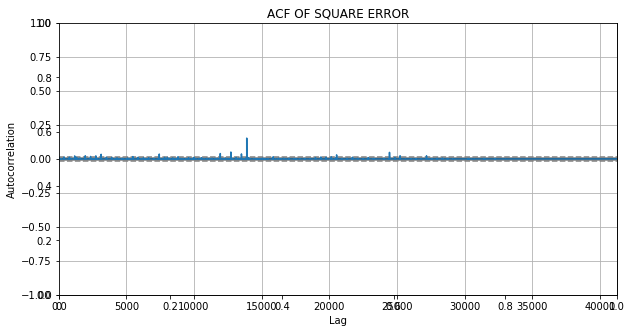

In [42]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF SQUARE ERROR')



Text(0,0.5,'PACF')

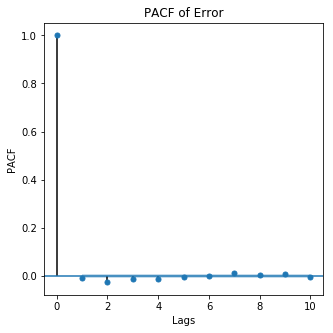

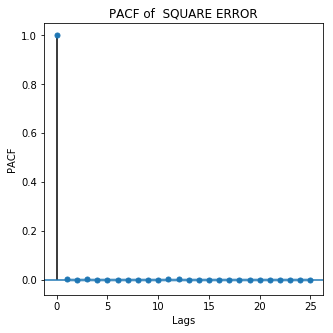

In [43]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')



# NASDAQ.ADP FORECAST

# OPTIMIZATION OF DATASET

In [44]:
df['logadp']=np.log(df['NASDAQ.ADP'])
df['diflogadp']=df['logadp']-df['logadp'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500,logaapl,diflogaapl,logadp,diflogadp
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,7.767945,-0.000207,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,7.768153,0.000601,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,7.767552,-0.000690,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,7.768242,-0.000228,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,7.768470,-0.000326,4.967449,-0.000835,4.625561,0.000196


In [45]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logsp500  

In [47]:
df.shape

(41263, 508)

# NASDAQ ADP DATASET

In [48]:
df_new=df[['DATE','NASDAQ.ADP','logadp','diflogadp']]
df_new.head()


,DATE,NASDAQ.ADP,logadp,diflogadp
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

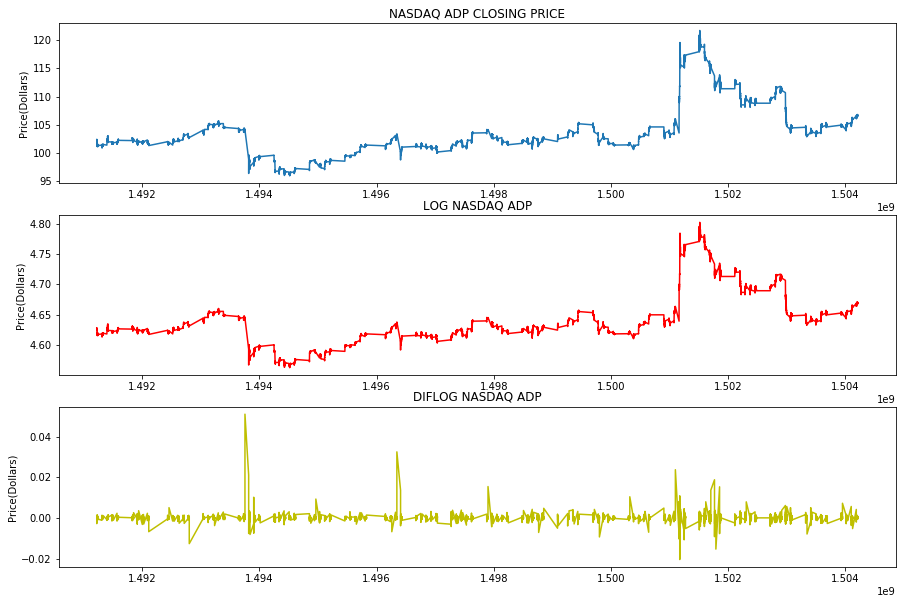

In [49]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.ADP'],label='NASDAQ ADP Price')
plt.title('NASDAQ ADP CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logadp,label='LOG NASDAQ ADP',color='r')
plt.title('LOG NASDAQ ADP')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogadp,label='DIFFERENCE IN LOG NASDAQ ADP',color='y')
plt.title('DIFLOG NASDAQ ADP')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ ADP

Text(0,0.5,'PACF')

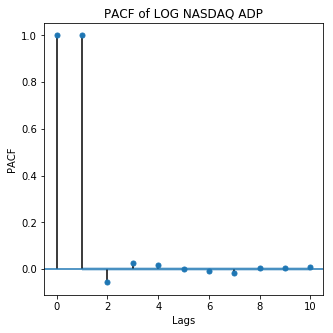

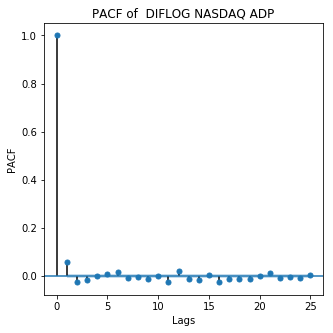

In [50]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logadp,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ ADP')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogadp,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ ADP')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ ADP

Text(0.5,1,'ACF OF DIFLOG NASDAQ ADP')

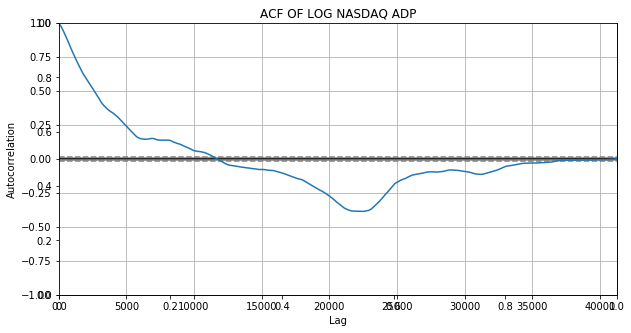

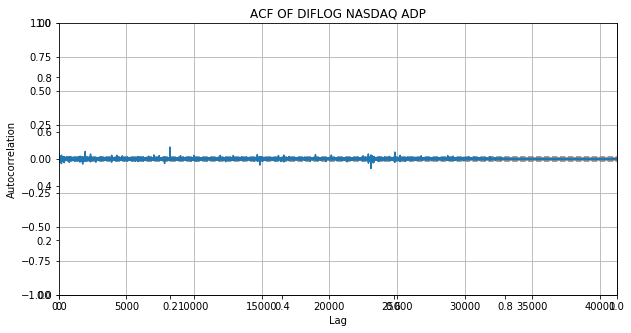

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logadp)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF LOG NASDAQ ADP')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogadp)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF DIFLOG NASDAQ ADP')


# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [52]:
arr=(df_new.logadp.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            warnings.filterwarnings("ignore")
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -482506.39573853416
(0, 1, 1) -482658.679544618
(0, 1, 2) -482672.4186598426
(1, 1, 0) -482651.8039193634
(1, 1, 1) -482667.0925541989
(1, 1, 2) -482680.664463324
(2, 1, 0) -482678.3762163945
(2, 1, 1) -482683.2200242913
(2, 1, 2) -482693.1767927883
Best model is : (2, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [53]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()
warnings.filterwarnings("ignore")

In [54]:
ARIMA_mod

In [55]:
ARIMA_mod.predict()
warnings.filterwarnings("ignore")

In [56]:
print('Length of the model:',len(ARIMA_mod.predict()))
warnings.filterwarnings("ignore")

Length of the model: 41262


In [57]:
df_new.shape

(41263, 4)

In [58]:
df_new.drop([0],axis=0,inplace=True)
warnings.filterwarnings("ignore")
df_new.head()

,DATE,NASDAQ.ADP,logadp,diflogadp
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196
5,1491226500,102.0400,4.625365,-0.002838


In [59]:
df_new['predict']=ARIMA_mod.predict()
warnings.filterwarnings("ignore")
df_new.head()

,DATE,NASDAQ.ADP,logadp,diflogadp,predict
1,1491226260,102.1400,4.626344,-0.000710,0.000001
2,1491226320,102.2125,4.627054,0.000710,-0.000051
3,1491226380,102.1400,4.626344,0.000784,0.000066
4,1491226440,102.0600,4.625561,0.000196,-0.000036
5,1491226500,102.0400,4.625365,-0.002838,-0.000045


# ERRORS

In [60]:
print('Mean Square Error:',np.mean(np.square(np.array((df_new['diflogadp']-df_new['predict'])))))

Mean Square Error: 4.90228301566397e-07


In [61]:
error=(df_new['diflogadp']-df_new['predict'])
warnings.filterwarnings("ignore")
df_new['Error']=error
df_new['SquareError']=np.square(error)


In [62]:
df_new.head()

,DATE,NASDAQ.ADP,logadp,diflogadp,predict,Error,SquareError
1,1491226260,102.1400,4.626344,-0.000710,0.000001,-0.000711,5.049036e-07
2,1491226320,102.2125,4.627054,0.000710,-0.000051,0.000760,5.779967e-07
3,1491226380,102.1400,4.626344,0.000784,0.000066,0.000718,5.155243e-07
4,1491226440,102.0600,4.625561,0.000196,-0.000036,0.000232,5.391133e-08
5,1491226500,102.0400,4.625365,-0.002838,-0.000045,-0.002793,7.798319e-06


Text(0,0.5,'Date')

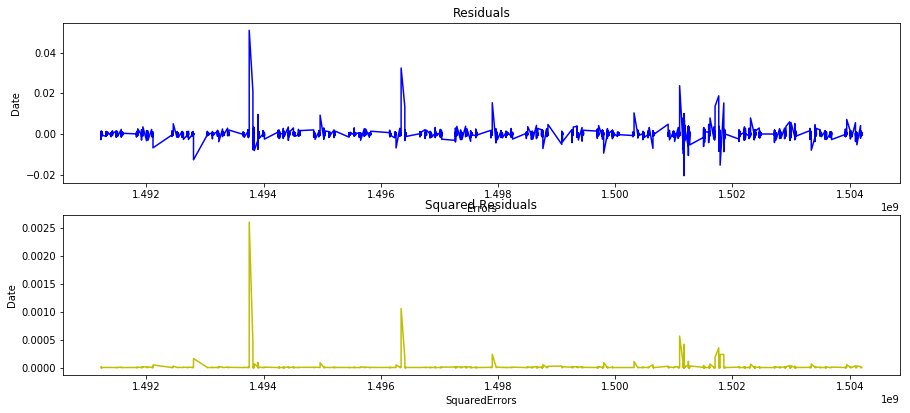

In [63]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


Text(0.5,1,'ACF OF SQUARE ERROR')

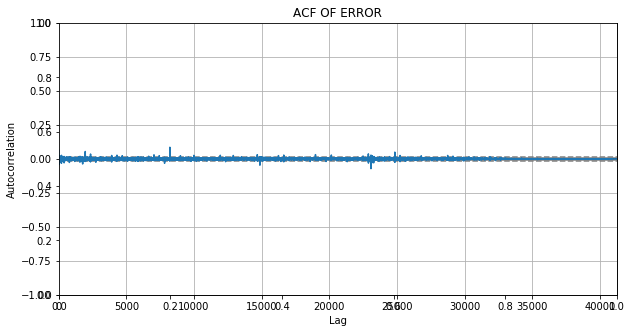

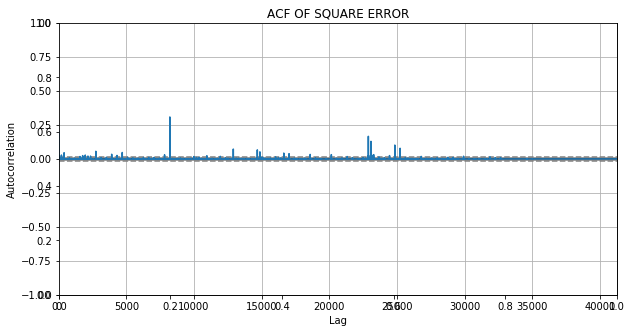

In [64]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

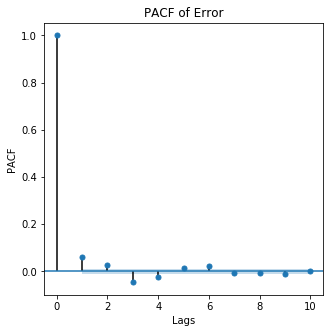

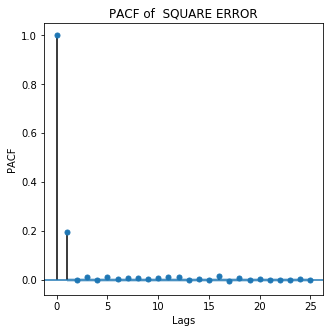

In [65]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ CBOE FORECAST

# DATASET OPTIMIZATION

In [66]:
df['logcboe']=np.log(df['NASDAQ.CBOE'])
df['diflogcboe']=df['logcboe']-df['logcboe'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,122.000,53.350,7.767945,-0.000207,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,121.770,53.350,7.768153,0.000601,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,121.700,53.365,7.767552,-0.000690,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,121.700,53.380,7.768242,-0.000228,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,121.695,53.240,7.768470,-0.000326,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232


In [67]:
df.dropna(inplace=True)

In [68]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logsp500        0
diflogsp500     0
logaapl   

In [69]:
df.shape

(41262, 510)

# NASDAQ CBOE DATASET

In [70]:
df_new=df[['DATE','NASDAQ.CBOE','logcboe','diflogcboe']]
df_new.head()


,DATE,NASDAQ.CBOE,logcboe,diflogcboe
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

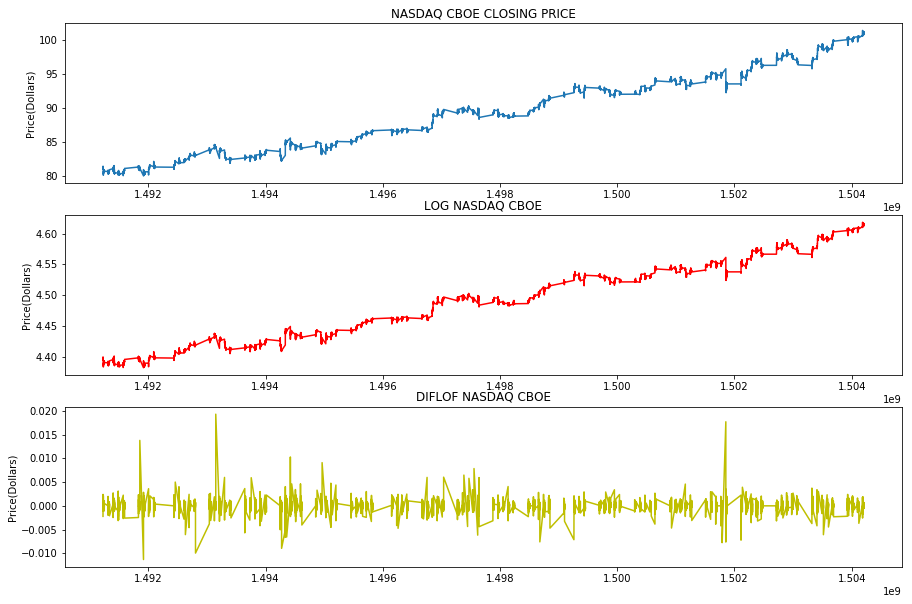

In [71]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.CBOE'],label='NASDAQ CBOE Price')
plt.title('NASDAQ CBOE CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logcboe,label='LOG SP500',color='r')
plt.title('LOG NASDAQ CBOE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogcboe,label='DIFFERENCE IN LOG NASDAQ CBOE',color='y')
plt.title('DIFLOF NASDAQ CBOE')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ CBOE

Text(0,0.5,'PACF')

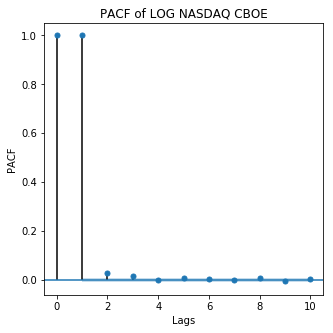

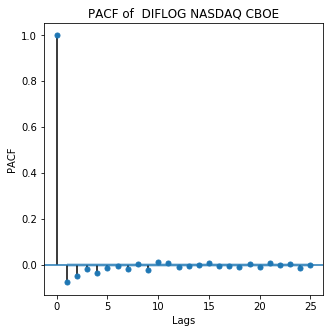

In [72]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logcboe,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ CBOE')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogcboe,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ CBOE')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ CBOE

Text(0.5,1,'ACF OF DIFLOG NASDAQ CBOE')

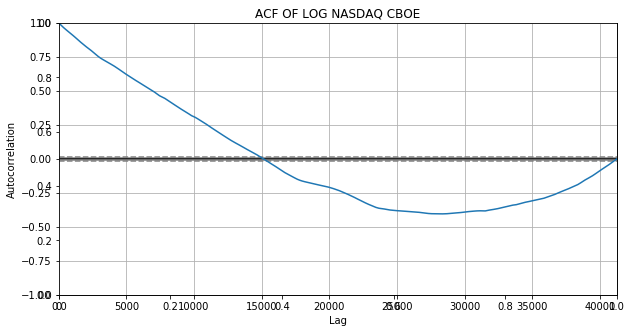

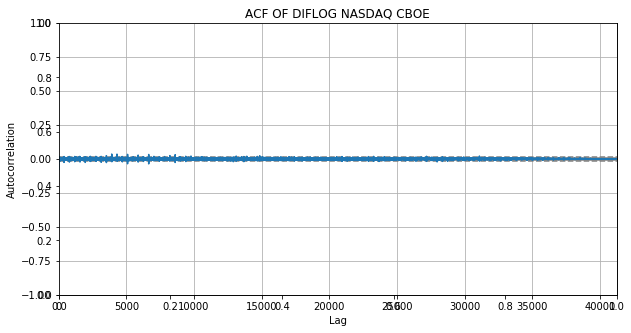

In [73]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logcboe)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF LOG NASDAQ CBOE')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogcboe)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF DIFLOG NASDAQ CBOE')



# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [74]:
arr=(df_new.logcboe.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            warnings.filterwarnings("ignore")
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -506031.5240405826
(0, 1, 1) -506297.27351928415
(0, 1, 2) -506388.20321942045
(1, 1, 0) -506274.3561169112
(1, 1, 1) -506431.61818768765
(1, 1, 2) -506423.50955865503
(2, 1, 0) -506369.71610583743
(2, 1, 1) -506424.69991336745
(2, 1, 2) -506430.9436682389
Best model is : (1, 1, 1)


# IMPLEMENTATION OF ARIMA MODEL

In [75]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()
warnings.filterwarnings("ignore")

In [76]:
ARIMA_mod
ARIMA_mod.predict()
warnings.filterwarnings("ignore")

In [77]:
print('Length of the arima model',len(ARIMA_mod.predict()))
warnings.filterwarnings("ignore")

Length of the arima model 41261


In [78]:
df_new.shape

(41262, 4)

In [79]:
df_new.head()

,DATE,NASDAQ.CBOE,logcboe,diflogcboe
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


In [80]:
df_new.drop([0],axis=0,inplace=True)
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.CBOE,logcboe,diflogcboe
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232
5,1491226500,81.22,4.397162,0.000739


In [81]:
df_new['predict']=ARIMA_mod.predict()
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.CBOE,logcboe,diflogcboe,predict
1,1491226260,81.21,4.397038,0.000000,0.000005
2,1491226320,81.21,4.397038,0.000986,-0.000166
3,1491226380,81.13,4.396053,0.000123,-0.000096
4,1491226440,81.12,4.395930,-0.001232,0.000026
5,1491226500,81.22,4.397162,0.000739,0.000029


# ERROR

In [82]:
print('Mean Squared Error:',np.mean(np.square(np.array((df_new['diflogcboe']-df_new['predict'])))))



Mean Squared Error: 2.81593257781072e-07


In [83]:
error=(df_new['diflogcboe']-df_new['predict'])
warnings.filterwarnings("ignore")
df_new['Error']=error
df_new['SquareError']=np.square(error)


In [84]:
df_new.head()

,DATE,NASDAQ.CBOE,logcboe,diflogcboe,predict,Error,SquareError
1,1491226260,81.21,4.397038,0.000000,0.000005,-0.000005,2.809673e-11
2,1491226320,81.21,4.397038,0.000986,-0.000166,0.001151,1.325552e-06
3,1491226380,81.13,4.396053,0.000123,-0.000096,0.000219,4.799229e-08
4,1491226440,81.12,4.395930,-0.001232,0.000026,-0.001258,1.583703e-06
5,1491226500,81.22,4.397162,0.000739,0.000029,0.000710,5.048052e-07


Text(0,0.5,'Date')

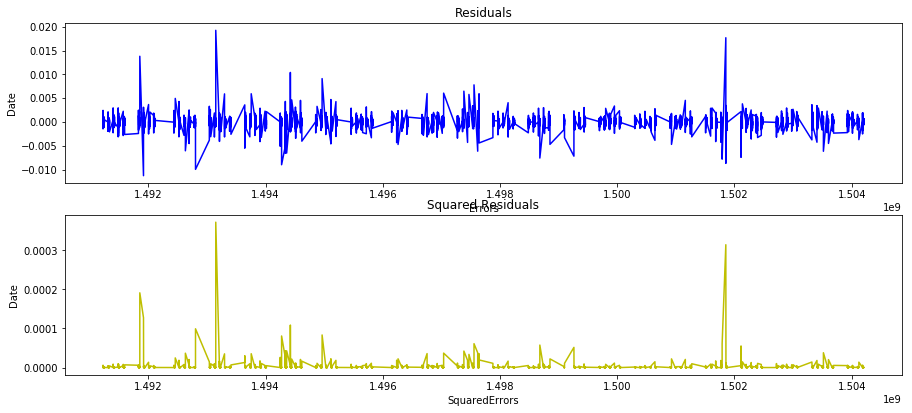

In [85]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


Text(0.5,1,'ACF OF SQUARE ERROR')

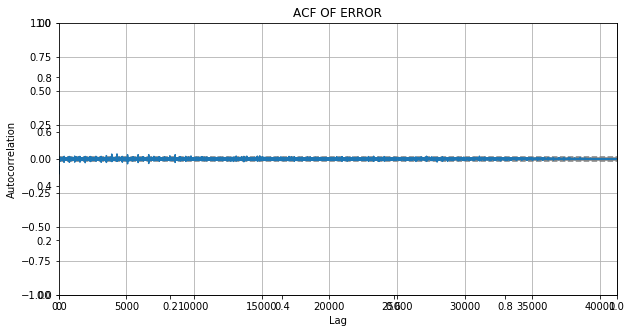

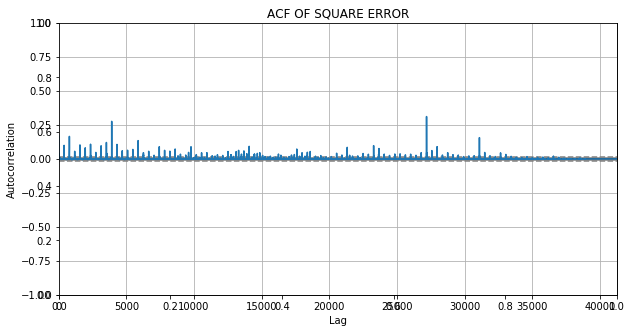

In [86]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

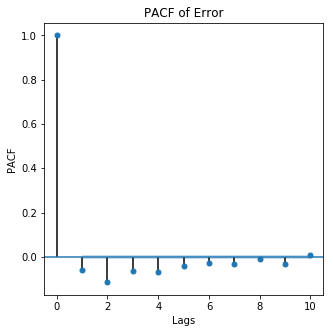

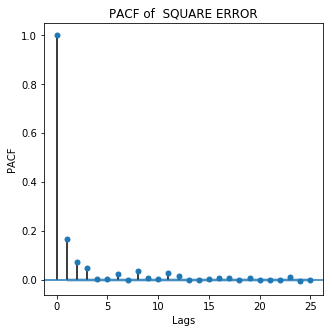

In [87]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ CSCO FORECAST

# DATASET OPTIMIZATION

In [90]:
df['logcsco']=np.log(df['NASDAQ.CSCO'])
df['diflogcsco']=df['logcsco']-df['logcsco'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,logsp500,diflogsp500,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe,logcsco,diflogcsco
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,7.767945,-0.000207,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,7.768153,0.000601,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,7.767552,-0.000690,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,7.768242,-0.000228,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,7.768470,-0.000326,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181


In [91]:
df.dropna(inplace=True)

In [92]:
df.isna().sum()


DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logsp500        0
diflogsp500     0
logaapl         0
diflogaapl      0
logadp    

In [93]:
df.shape

(41261, 512)

# NASDAQ CSCO DATASET

In [94]:
df_new=df[['DATE','NASDAQ.CSCO','logcsco','diflogcsco']]
df_new.head()


,DATE,NASDAQ.CSCO,logcsco,diflogcsco
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

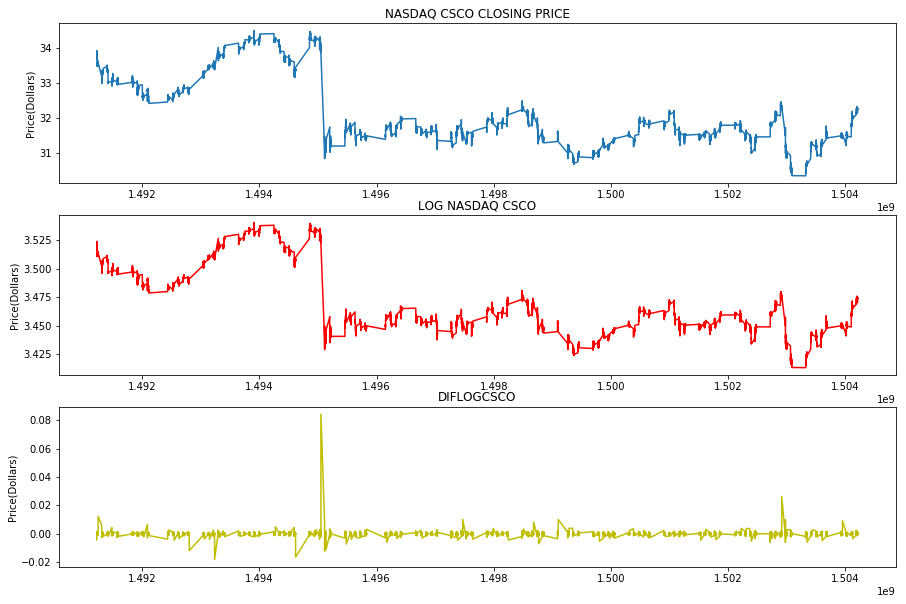

In [95]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.CSCO'],label='NASDAQ CSCO Price')
plt.title('NASDAQ CSCO CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logcsco,label='LOG CSCO Price',color='r')
plt.title('LOG NASDAQ CSCO')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogcsco,label='DIFFERENCE IN LOG SP500',color='y')
plt.title('DIFLOGCSCO')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ CSCO

Text(0,0.5,'PACF')

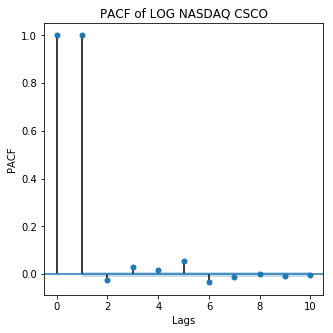

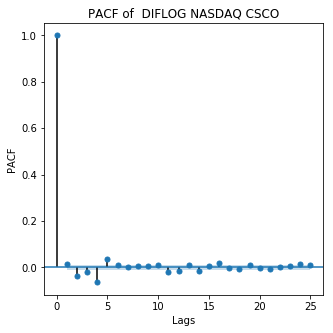

In [96]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logcsco,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ CSCO')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogcsco,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ CSCO')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ CSCO

Text(0.5,1,'ACF OF DIFLOG NASDAQ CSCO')

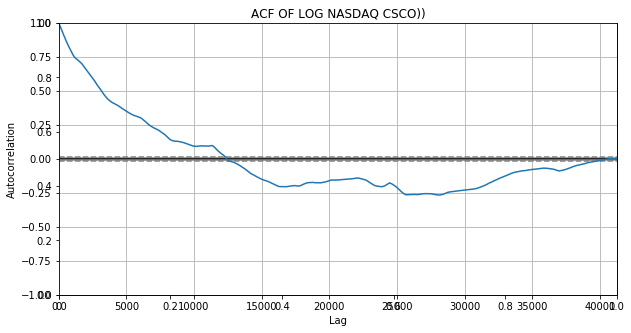

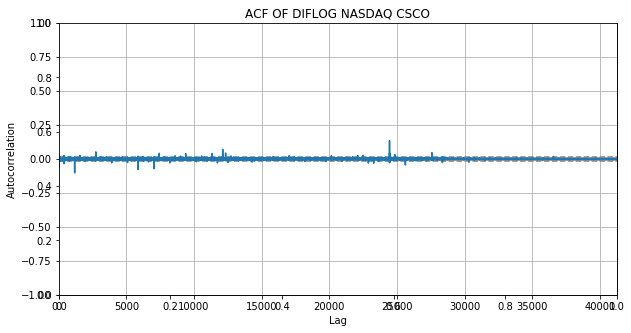

In [97]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logcsco)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF LOG NASDAQ CSCO))')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogcsco)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF DIFLOG NASDAQ CSCO')


# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [98]:
arr=(df_new.logcsco.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            warnings.filterwarnings("ignore")
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -486803.59648868546
(0, 1, 1) -486813.1341353678
(0, 1, 2) -486874.18309483514
(1, 1, 0) -486812.33879456064
(1, 1, 1) -486813.8884587721
(1, 1, 2) -486873.7982307859
(2, 1, 0) -486868.3864054694
(2, 1, 1) -486866.8346065688
(2, 1, 2) -486883.6386567467
Best model is : (2, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [99]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()
warnings.filterwarnings("ignore")

In [100]:
ARIMA_mod

In [101]:
ARIMA_mod.predict()
warnings.filterwarnings("ignore")

In [102]:
print('Length of the model:',len(ARIMA_mod.predict()))
warnings.filterwarnings("ignore")

Length of the model: 41260


In [103]:
df_new.shape

(41261, 4)

In [104]:
df_new.head()

,DATE,NASDAQ.CSCO,logcsco,diflogcsco
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


In [105]:
df_new.drop([0],axis=0,inplace=True)
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.CSCO,logcsco,diflogcsco
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181
5,1491226500,33.8800,3.522825,-0.000590


In [107]:
df_new['predict']=ARIMA_mod.predict()
warnings.filterwarnings("ignore")
df_new.head()

,DATE,NASDAQ.CSCO,logcsco,diflogcsco,predict
1,1491226260,33.8800,3.522825,-0.000590,-0.000001
2,1491226320,33.9000,3.523415,0.001479,0.000065
3,1491226380,33.8499,3.521936,0.000293,-0.000147
4,1491226440,33.8400,3.521644,-0.001181,-0.000044
5,1491226500,33.8800,3.522825,-0.000590,0.000034


# ERROR

In [108]:
print('Mean squared error:',np.mean(np.square(np.array((df_new['diflogcsco']-df_new['predict'])))))

Mean squared error: 4.403112269480604e-07


In [109]:
error=(df_new['diflogcsco']-df_new['predict'])
warnings.filterwarnings("ignore")
df_new['Error']=error
df_new['SquareError']=np.square(error)


In [110]:
df_new.head()

,DATE,NASDAQ.CSCO,logcsco,diflogcsco,predict,Error,SquareError
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,-0.000589,3.469032e-07
2,1491226320,33.9000,3.523415,0.001479,0.000065,0.001414,2.000399e-06
3,1491226380,33.8499,3.521936,0.000293,-0.000147,0.000440,1.935584e-07
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,-0.001137,1.292942e-06
5,1491226500,33.8800,3.522825,-0.000590,0.000034,-0.000624,3.891486e-07


Text(0,0.5,'Date')

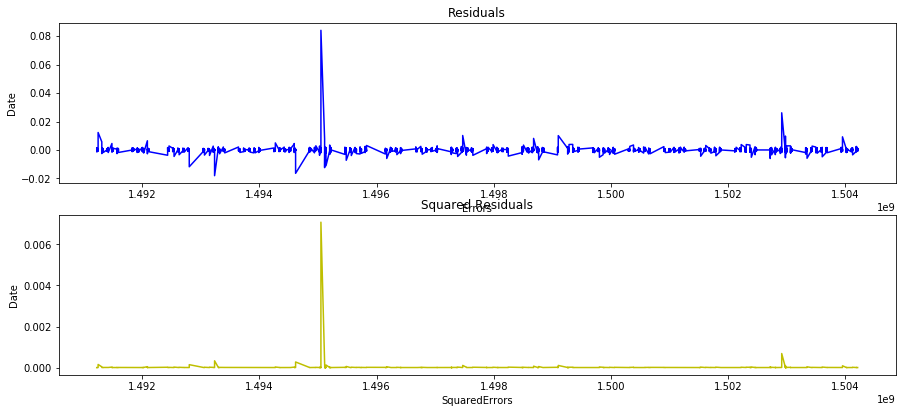

In [111]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


Text(0.5,1,'ACF OF SQUARE ERROR')

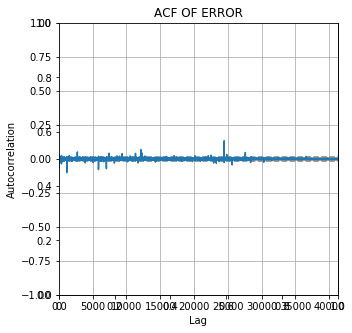

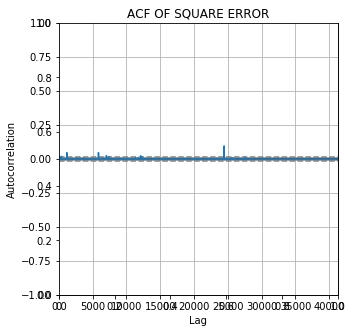

In [112]:
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.Error)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.SquareError)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

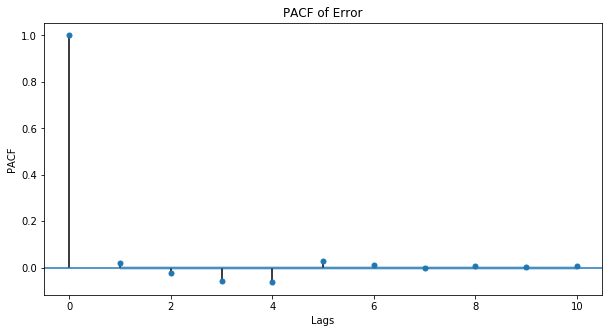

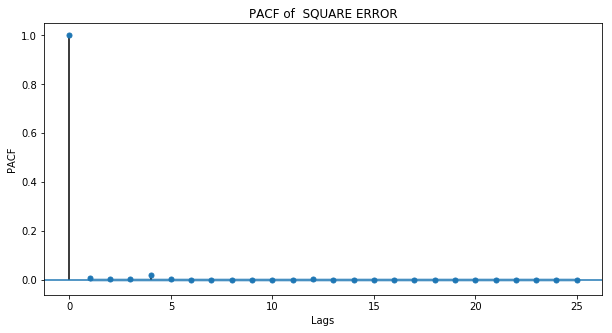

In [113]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ EBAY DATASET

In [114]:
df['logebay']=np.log(df['NASDAQ.EBAY'])
df['diflogebay']=df['logebay']-df['logebay'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe,logcsco,diflogcsco,logebay,diflogebay
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141,3.508481,0.000075
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590,3.508406,-0.000449
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479,3.508855,0.002247
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293,3.506608,-0.001948
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181,3.508556,-0.000898


In [115]:
df.dropna(inplace=True)

In [116]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logsp500        0
diflogsp500     0
logaapl         0
diflogaapl      0
logadp          0
diflogadp       0
logcboe   

In [117]:
df.shape

(41260, 514)

# NASDAQ EBAY DATASET

In [118]:
df_new=df[['DATE','NASDAQ.EBAY','logebay','diflogebay']]
df_new.head()


,DATE,NASDAQ.EBAY,logebay,diflogebay
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

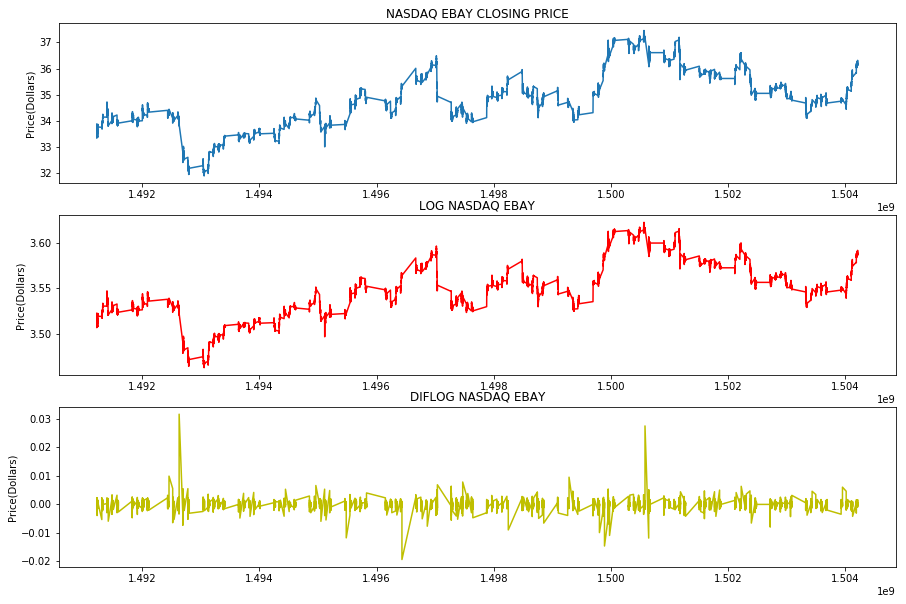

In [119]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.EBAY'],label='NASDAQ EBAY Price')
plt.title('NASDAQ EBAY CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logebay,label='LOG SP500',color='r')
plt.title('LOG NASDAQ EBAY')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogebay,label='DIFFERENCE IN LOG SP500',color='y')
plt.title('DIFLOG NASDAQ EBAY')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ EBAY

Text(0,0.5,'PACF')

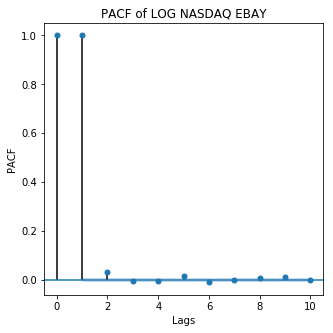

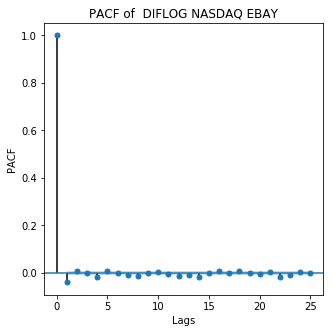

In [120]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logebay,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ EBAY')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogebay,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ EBAY')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ EBAY

Text(0.5,1,'ACF OF DIFLOG NASDAQ EBAY')

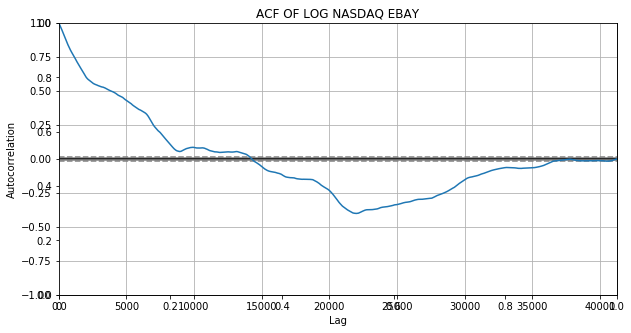

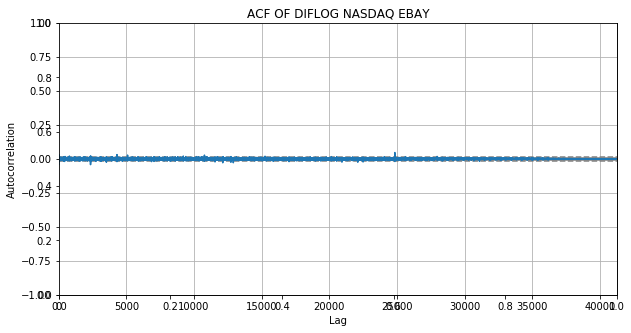

In [121]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logebay)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF LOG NASDAQ EBAY')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogebay)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF DIFLOG NASDAQ EBAY')



# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [122]:
arr=(df_new.logebay.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            warnings.filterwarnings("ignore")
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -486462.4859575598
(0, 1, 1) -486525.8700918315
(0, 1, 2) -486526.327053628
(1, 1, 0) -486526.80238083395
(1, 1, 1) -486526.1291623222
(1, 1, 2) -486524.44805122894
(2, 1, 0) -486526.4161140592
Best model is : (1, 1, 0)


# IMPLEMENTATION OF ARIMA MODEL

In [130]:
ARIMA_mod

In [124]:
ARIMA_mod.predict()
warnings.filterwarnings("ignore")

In [125]:
print('Length of the ARIMA Model:',len(ARIMA_mod.predict()))
warnings.filterwarnings("ignore")

Length of the ARIMA Model: 41260


In [129]:
df_new.shape

(41260, 5)

In [130]:
df_new.head()

,DATE,NASDAQ.EBAY,logebay,diflogebay,predict
0,1491226200,33.3975,3.508481,0.000075,-0.000001
1,1491226260,33.3950,3.508406,-0.000449,0.000065
2,1491226320,33.4100,3.508855,0.002247,-0.000147
3,1491226380,33.3350,3.506608,-0.001948,-0.000044
4,1491226440,33.4000,3.508556,-0.000898,0.000034


In [131]:
df_new['predict']=ARIMA_mod.predict()
warnings.filterwarnings("ignore")
df_new.head()


,DATE,NASDAQ.EBAY,logebay,diflogebay,predict
0,1491226200,33.3975,3.508481,0.000075,-0.000001
1,1491226260,33.3950,3.508406,-0.000449,0.000065
2,1491226320,33.4100,3.508855,0.002247,-0.000147
3,1491226380,33.3350,3.506608,-0.001948,-0.000044
4,1491226440,33.4000,3.508556,-0.000898,0.000034


# ERRORS

In [132]:
print('Length of the ARIMA model:',np.mean(np.square(np.array((df_new['diflogebay']-df_new['predict'])))))

Length of the ARIMA model: 4.445305010853907e-07


In [133]:
error=(df_new['diflogebay']-df_new['predict'])
warnings.filterwarnings("ignore")
df_new['Error']=error
df_new['SquareError']=np.square(error)


In [134]:
df_new.head()

,DATE,NASDAQ.EBAY,logebay,diflogebay,predict,Error,SquareError
0,1491226200,33.3975,3.508481,0.000075,-0.000001,0.000076,5.778804e-09
1,1491226260,33.3950,3.508406,-0.000449,0.000065,-0.000514,2.638702e-07
2,1491226320,33.4100,3.508855,0.002247,-0.000147,0.002395,5.735079e-06
3,1491226380,33.3350,3.506608,-0.001948,-0.000044,-0.001904,3.624245e-06
4,1491226440,33.4000,3.508556,-0.000898,0.000034,-0.000931,8.676430e-07


Text(0,0.5,'Date')

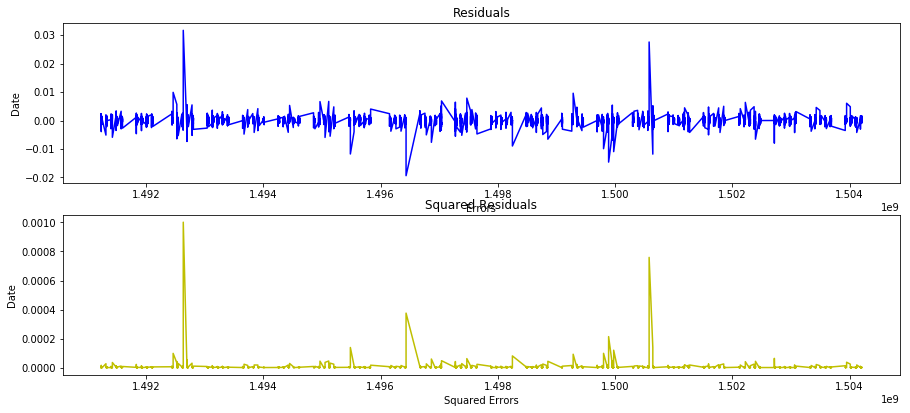

In [135]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('Squared Errors')
plt.ylabel('Date')


Text(0.5,1,'ACF OF SQUARE ERROR')

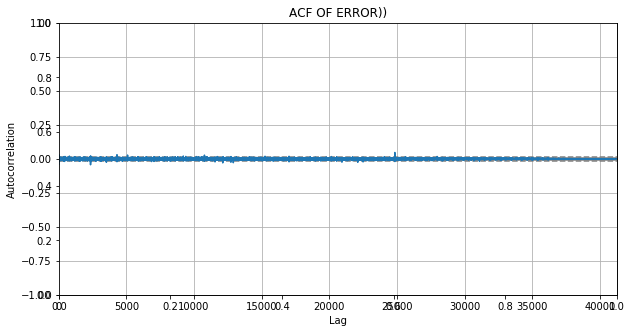

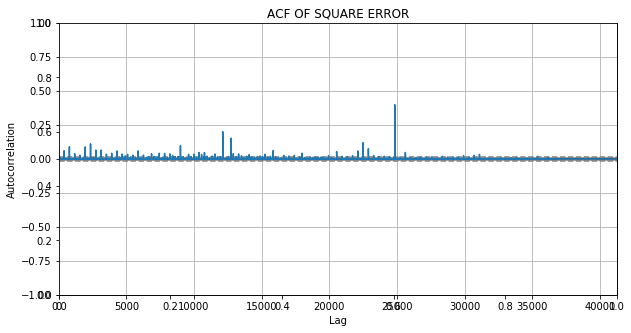

In [136]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF ERROR))')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
warnings.filterwarnings("ignore")
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

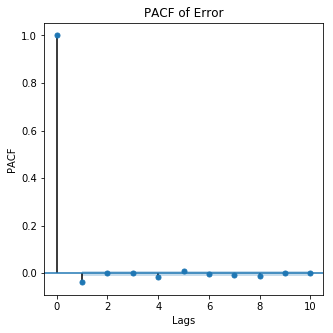

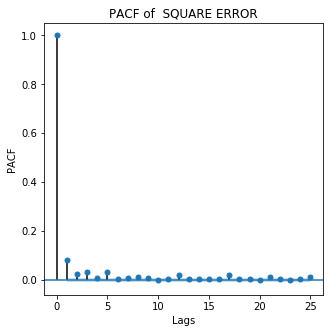

In [137]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

